In [1]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/253.7 kB ? eta -:--:--
   ---------------------------------------- 253.7/253.7 kB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.3 kB ? eta -:--:--
   ---------------------------------------- 75.3/75.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ----------------------------- ---------- 1.9/2.6 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 42.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 32.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/185.0 kB ? eta -:--:--
   ---------------------------------------- 185.0/185.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   - -------------------------------------- 1.4

In [2]:
import librosa

# WAV 파일 로드
audio_path = './data/IU/vocal/IU_1 [vocals].wav'
waveform, sampling_rate = librosa.load(audio_path, sr=None)

# 샘플링 레이트 출력
print("Sampling Rate:", sampling_rate)

Sampling Rate: 44100


In [3]:
# 스펙트로그램 생성
spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sampling_rate, n_mels=128, hop_length=512)

# 스펙트로그램 출력
print("Spectrogram shape:", spectrogram.shape)

Spectrogram shape: (128, 2584)


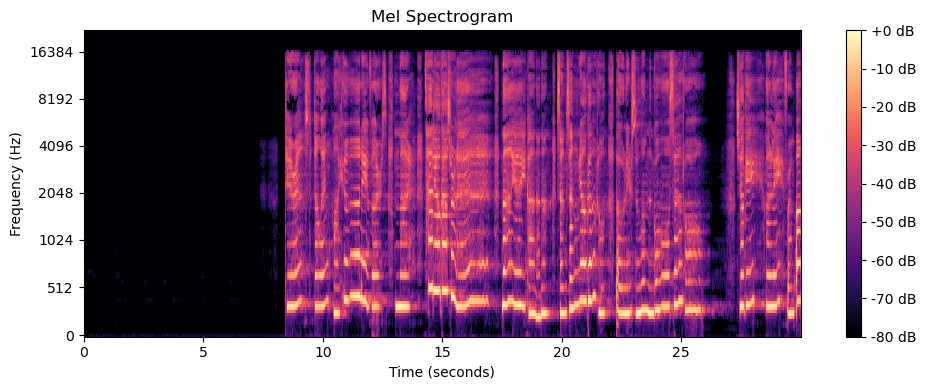

In [5]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 스펙트로그램 출력
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sampling_rate, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def load_and_convert_to_melspectrogram(file_path):
    y, sr = librosa.load(file_path, sr=22050)  # Load the file with a sampling rate of 22050 Hz
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()
    
    return S_DB


In [17]:
import torch
from torch.utils.data import Dataset, DataLoader

class MelSpectrogramDataset(Dataset):
    def __init__(self, file_paths):
        self.file_paths = file_paths
        self.data = []
        for file_path in file_paths:
            waveform, sr = librosa.load(file_path, sr=None)
            spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sr, n_mels=128, hop_length=512)
            spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
            self.data.append(torch.tensor(spectrogram_db, dtype=torch.float32))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 파일 경로 리스트 생성
file_paths = ['./data/IU/vocal/IU_1 [vocals].wav',
              './data/IU/vocal/IU_2 [vocals].wav',
              './data/IU/vocal/IU_3 [vocals].wav',
              './data/IU/vocal/IU_4 [vocals].wav',
              './data/IU/vocal/IU_5 [vocals].wav',
              './data/IU/vocal/IU_6 [vocals].wav',
              './data/IU/vocal/IU_7 [vocals].wav',
              './data/IU/vocal/IU_8 [vocals].wav',
              './data/IU/vocal/IU_9 [vocals].wav',
              './data/IU/vocal/IU_10 [vocals].wav'
              ]  # 여러 파일을 리스트로 추가 가능

# 데이터셋 및 데이터 로더 초기화
dataset = MelSpectrogramDataset(file_paths)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# 데이터 로더를 통한 데이터 확인
for batch in dataloader:
    print(batch.shape)  # 각 배치의 차원을 출력


torch.Size([1, 128, 2584])
torch.Size([1, 128, 2584])
torch.Size([1, 128, 2584])
torch.Size([1, 128, 2584])
torch.Size([1, 128, 2584])
torch.Size([1, 128, 2585])
torch.Size([1, 128, 2584])
torch.Size([1, 128, 2584])
torch.Size([1, 128, 2584])
torch.Size([1, 128, 2584])
